In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#verinin çekilmesi
veriler=pd.read_csv("maaslar.csv")
veriler.head(5)

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500


POLİNOMSAL REGRESYON ŞABLONU 


In [3]:
#değişkenleri ayırmak.. y=a+bx^2 ifadesi..
x=veriler.iloc[:,1:2]
x
y=veriler.iloc[:,-1:]

#Eğer ben x.values yazarsam ben bunları np.array'lere çevirmiş olurum. 

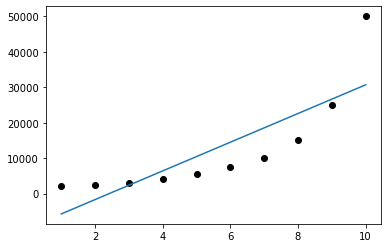

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()  #bir kapsül oluşturalım.
lin_reg.fit(x.values,y.values) #kolonların değerlerini alalım ki aşağıdaki gösterimde sorun oluşmasın.

plt.scatter(x.values,y.values,color="black")
plt.plot(x,lin_reg.predict(x.values)) #tahmin etme (predict.)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


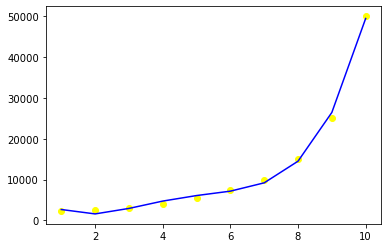

In [5]:
from sklearn.preprocessing import PolynomialFeatures   #bunu kullanıcaz.
#for a in range(0,5,2): #for'a aldım..

poly_reg=PolynomialFeatures(degree=4) #bir kapsül oluşturdum ve degree(Derecesini 2 yapalım buna istediğimi verebilirim ama benim problemime uygun olmalı)

x_poly=poly_reg.fit_transform(x.values) #x'in değerlerini polinomal dünyaya çevirme.

print(x_poly)

    #şimdi yine linearRegression kapsülünü kullanarak. y=a^0+bx+cx^2 ye göre y'yi öğren dicez.

lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

    #bunu görselleştirelim..
plt.scatter(x.values,y.values,color="yellow") #noktalasal bir gösterime sahip oluyor.
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x.values)),color="blue") #tahmin edeceğin her durumu bu dünyada göster: Dünya ---->poly_reg.fit_transform(x.values)

Linear ve Polinomsal Regresyonun Tahmininlerinin karşılaştırması


In [6]:
print(lin_reg.predict([[11]]))# Eğer eğitim seviyesi 11 ise ne kadar maaş verir. Makine öğrenmesinin cevabı

print(lin_reg.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


In [7]:
#print(lin_reg2.predict([[11]])) bu şekilde çalıştırırsan bu hatayı alırsın ---> matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

"""Bunu polinomsal dünyaya çevirmen gerekiyor."""

print(lin_reg2.predict(poly_reg.fit_transform([[11]])))
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))

[[89041.66666667]]
[[8146.9948718]]


SUPPORT VECTOR MACHINE

c:\Users\yusuf\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


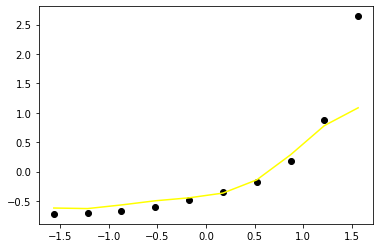

In [8]:
#şimdi StandarScaler çağıralım.BU ÖNEMLİ BİR NOKTA.
#Normalization (Normalleştirme İşlemleri)

from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli=sc1.fit_transform(x.values)
sc2=StandardScaler()
y_olcekli=sc2.fit_transform(y.values)



from sklearn.svm import SVR

svr_reg=SVR(kernel='rbf') #bu ikisi arasındaki ilişkiyi kurmasını istiyoruz.
svr_reg.fit(x_olcekli,y_olcekli) 

plt.scatter(x_olcekli,y_olcekli,color='black')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color="yellow") #çizgimizde x_olcekli ekseninde bir çizgi çizecek

Support Machine Predict

In [9]:
#peki listenin dışında olan bazı değerleri rbf ile tahmin ettirmeye çalışalım..

print(svr_reg.predict([[6.6]]))

[0.01150915]


Decision TREE

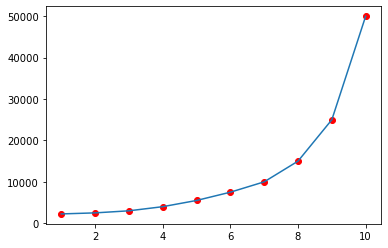

In [10]:
from sklearn.tree import DecisionTreeRegressor

r_dt=DecisionTreeRegressor(random_state=0) #bir kapsül oluşturalım

r_dt.fit(x.values,y.values) #x'ten y'leri öğren diyoruz.

plt.scatter(x.values,y.values,color="red")#bize bu uzayı çiz diyoruz.

plt.plot(x.values,r_dt.predict(x.values))

Decision TREE PREDICT

In [11]:
#başka tahminler yapılması..

print(r_dt.predict([[16]]))
print(r_dt.predict([[6.6]])) 

#Outputlaradan da anlaşılacağı üzere belli kısımda kaldığı sürece hep aynı değerlere söz konusu oluyor..

[50000.]
[10000.]


## RANDOM FOREST BAŞLANGICI 

 ravel()  fonksiyonu diziyi düzleştirmek yani yassılaştırmak için kullanılır.

 print(dizi.ravel())

 output: [23, 23, 23, 23, 23, 23]

 print(dizi.ravel().ndim)
 
 output: 1  

  ndim()  fonksiyonu bir dizinin boyutunu öğrenmemizi sağlar

In [12]:
from sklearn.ensemble import RandomForestRegressor

randomfor_reg= RandomForestRegressor(random_state=0,n_estimators=10) #hemen bir kapsül oluşturalım. Ve bu kapsülün içine iki tane parametre vericem.
#bunlardan biri DecisionTree'de de olduğu gibi random_state=0, diğeri ise kaç tane decision tree çizeleceği olan (n_estimators=10)
randomfor_reg.fit(x.values,y.values.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

Random Forest'in Tahmini

In [13]:

randomfor_reg.predict([[6.6]]) #random_forest'ın 6.6. statüdeki bir kişiye vereceği maaş tahmini

array([10500.])

In [14]:
randomfor_reg.predict([[19]]) #random_forest'ın 11. statüdeki bir kişiye vereceği maaş tahmini

array([42500.])

Görselleştirme İşlemleri



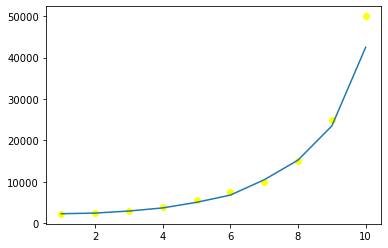

In [15]:



plt.scatter(x.values,y.values,color="yellow") #bana bu uzayı yarat diyorum.
plt.plot(x.values,randomfor_reg.predict(x.values))

Random Forest ile Decision Tree Genel Farkı şu aslında. 

Random forest arka bahçede decision Tree kullanıyor ancak aynı değiller. ÖRNEĞİN: 


Decision Tree ne olursa olsun min-max arasında bir değer vermek zorunda. Ancak Random Forest böyle bir zorunluluğu yok.


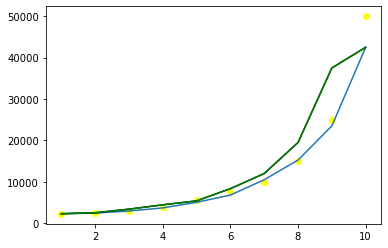

In [16]:

Z= x.values + 0.5
K= x.values + 0.4




plt.scatter(x.values,y.values,color="yellow") #bana bu uzayı yarat diyorum.
plt.plot(x.values,randomfor_reg.predict(x.values))
plt.plot(x.values,randomfor_reg.predict(Z),color= "black")
plt.plot(x.values,randomfor_reg.predict(K),color="green")



## R2 YÖNTEMİ 

R^2= 1- (Target- Predict)^2 / (Target - Predict(average))^2

0 altına düşerse durumunuz çok vahim. Hiç bişey yapmasanız sadece target ortalamayı alsanız 0 çıkar öyle bi durum.

Değerimiz 1'e yaklaşırsa o kadar iyi durumdayız demektir.


Gerçek ve tahmin arasındaki bağlantıyı bulur.


In [17]:
from sklearn.metrics import r2_score

a=r2_score(y.values,randomfor_reg.predict(x.values)) #ilk parametrem target(Y), ikincisi ise ise tahminlerimiz.
b=r2_score(y.values,r_dt.predict(x.values)) #Decision Tree
c=r2_score(y_olcekli,svr_reg.predict(x_olcekli)) #support vector Regression 
d=r2_score(y.values,lin_reg.predict(x.values)) #Lineer Regresyon
e=r2_score(y.values,lin_reg2.predict(poly_reg.fit_transform(x.values))) #Polinamsal Regresyon



# output olarak 0.97 verdi.. Mükemmel değerimiz r2 göre 

print(f"# Random forest algoritmasını kullanarak R2 değerimizi  {a} verdi.. Mükemmel değerimiz r2 göre 1  zaten ")



# Random forest algoritmasını kullanarak R2 değerimizi  0.9704434230386582 verdi.. Mükemmel değerimiz r2 göre 1  zaten 


In [18]:
print(f"# Decision Tree algoritmasını kullanarak R2 değerimizi  {b} verdi.. Mükemmel değerimiz r2 göre  1 zaten ") #Aslında sanıldığı kadar mükemmel değil. Farklı veri seti gelince patlıcak

# Decision Tree algoritmasını kullanarak R2 değerimizi  1.0 verdi.. Mükemmel değerimiz r2 göre  1 zaten 


In [19]:

print(f"# support vector Regression  algoritmasını kullanarak R2 değerimizi  {c} verdi.. Mükemmel değerimiz r2 göre 1 zaten ") 


# support vector Regression  algoritmasını kullanarak R2 değerimizi  0.7513836788854973 verdi.. Mükemmel değerimiz r2 göre 1 zaten 


In [20]:
print(f"# Random forest algoritmasını kullanarak R2 değerimizi  {d} verdi.. Mükemmel değerimiz r2 göre 1  zaten ")

# Random forest algoritmasını kullanarak R2 değerimizi  0.6690412331929894 verdi.. Mükemmel değerimiz r2 göre 1  zaten 


In [21]:
print(f"# Polinomsal Regresyon algoritmasını kullanarak R2 değerimizi  {e} verdi.. Mükemmel değerimiz r2 göre 1  zaten ")

# Polinomsal Regresyon algoritmasını kullanarak R2 değerimizi  0.9973922891706613 verdi.. Mükemmel değerimiz r2 göre 1  zaten 
